In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [4]:
df = pd.read_csv('data/multiTimelinePL.csv', skiprows=1)
df.head()

,Неделя,Java: (Россия),Go: (Россия),Spring Framework: (Россия)
0,2015-12-06,93,12,5
1,2015-12-13,90,13,4
2,2015-12-20,86,13,6
3,2015-12-27,74,15,2
4,2016-01-03,68,8,4


In [7]:
df.columns = ['week', 'Java', 'Go', 'Spring']
df.head()

,week,Java,Go,Spring
0,2015-12-06,93,12,5
1,2015-12-13,90,13,4
2,2015-12-20,86,13,6
3,2015-12-27,74,15,2
4,2016-01-03,68,8,4


In [8]:
df.week = pd.to_datetime(df.week)
df.set_index('week', inplace=True)
df.head()

,Java,Go,Spring
week,,,
2015-12-06,93,12,5
2015-12-13,90,13,4
2015-12-20,86,13,6
2015-12-27,74,15,2
2016-01-03,68,8,4


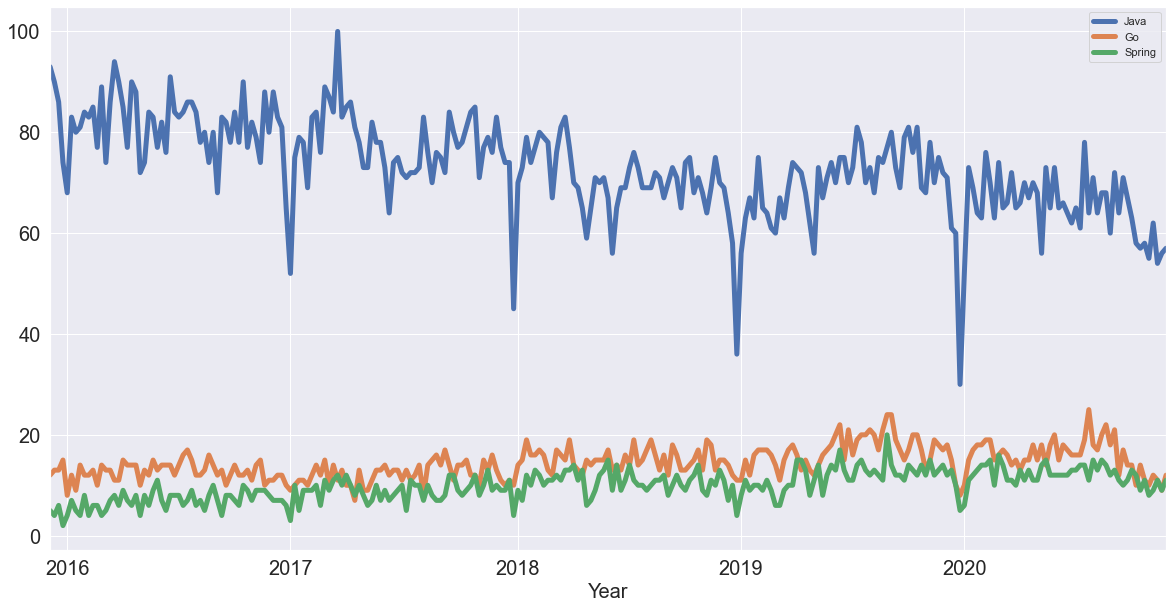

In [10]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

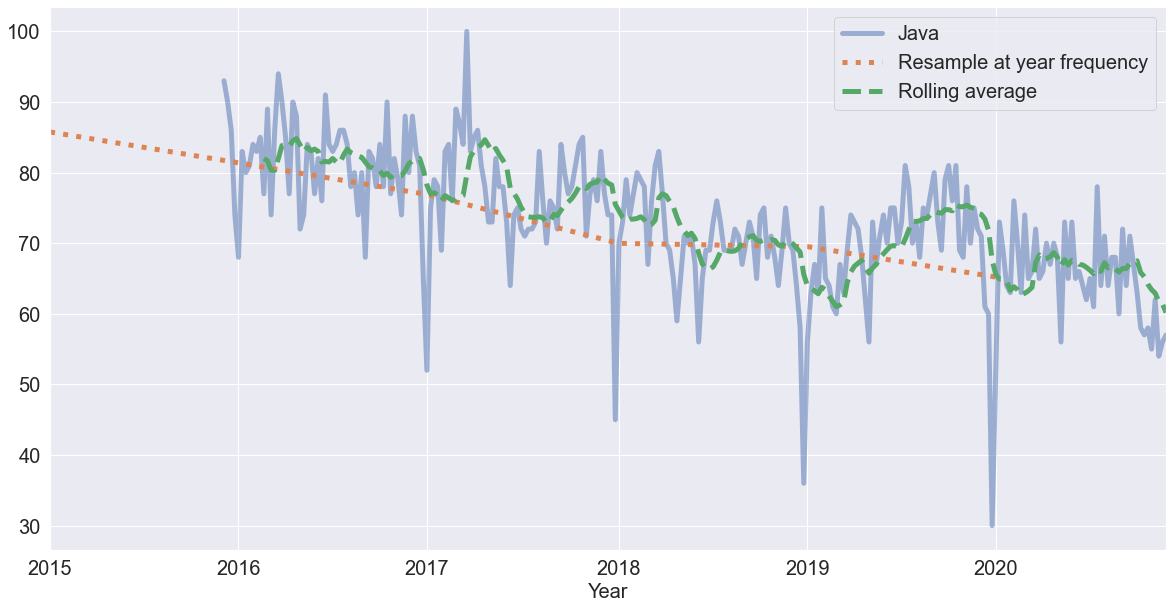

In [12]:
java = df['Java']
java_resample = java.resample('A').mean()
java_rolling = java.rolling(12).mean()

ax = java.plot(figsize=(20,10), linewidth=5, fontsize=20, alpha=0.5, style='-')
java_resample.plot(style=':', linewidth=5, label='Resample at year frequency', ax=ax)
java_rolling.plot(style='--', linewidth=5, label='Rolling average', ax=ax)
ax.legend(fontsize=20)
# diet.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
# diet.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

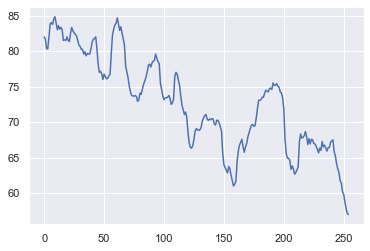

In [13]:
x = np.asarray(df[['Java']])
win_size = 12
win_half = int(win_size / 2)
java_smooth = np.array([x[(idx-win_half):(idx+win_half)].mean() for idx in np.arange(win_half, len(x))])
plt.plot(java_smooth)

Text(0.5, 0, 'Year')

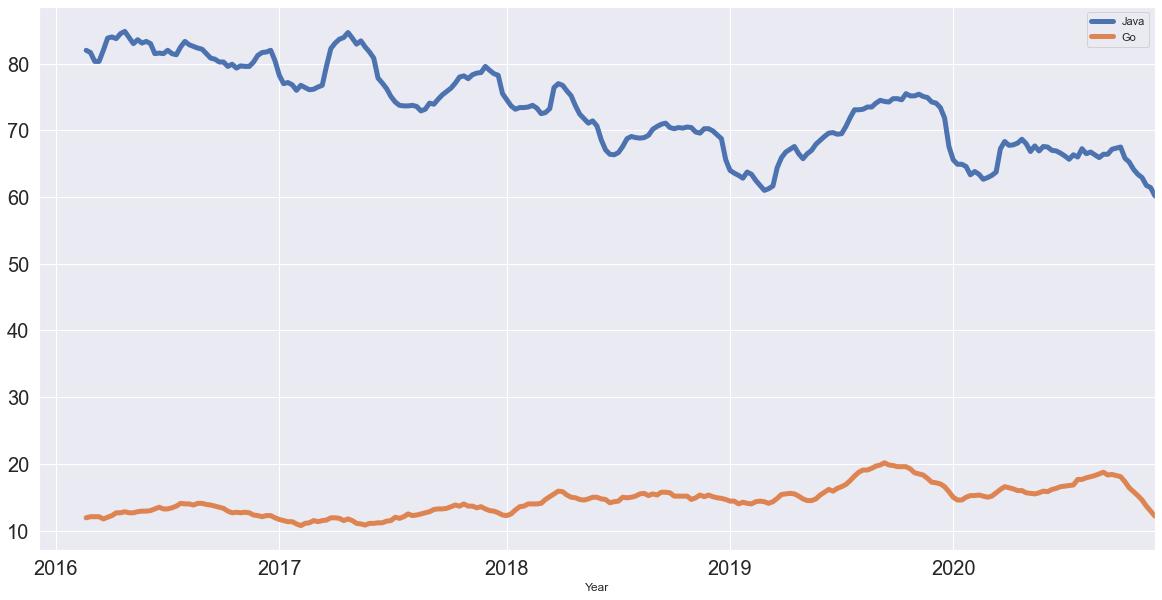

In [14]:
go = df['Go']
df_average = pd.concat([java.rolling(12).mean(), go.rolling(12).mean()], axis=1)
df_average.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year')

Text(0.5, 0, 'Year')

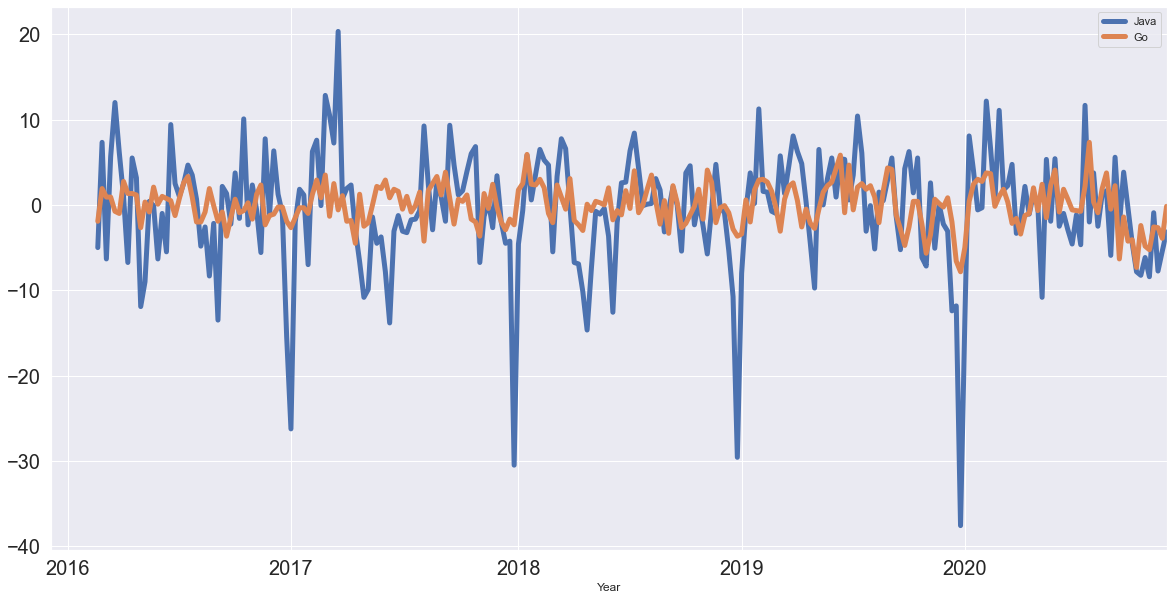

In [15]:
df_diff_trend = df[['Java', 'Go']] - df_average
df_diff_trend.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year')

Text(0.5, 0, 'Year')

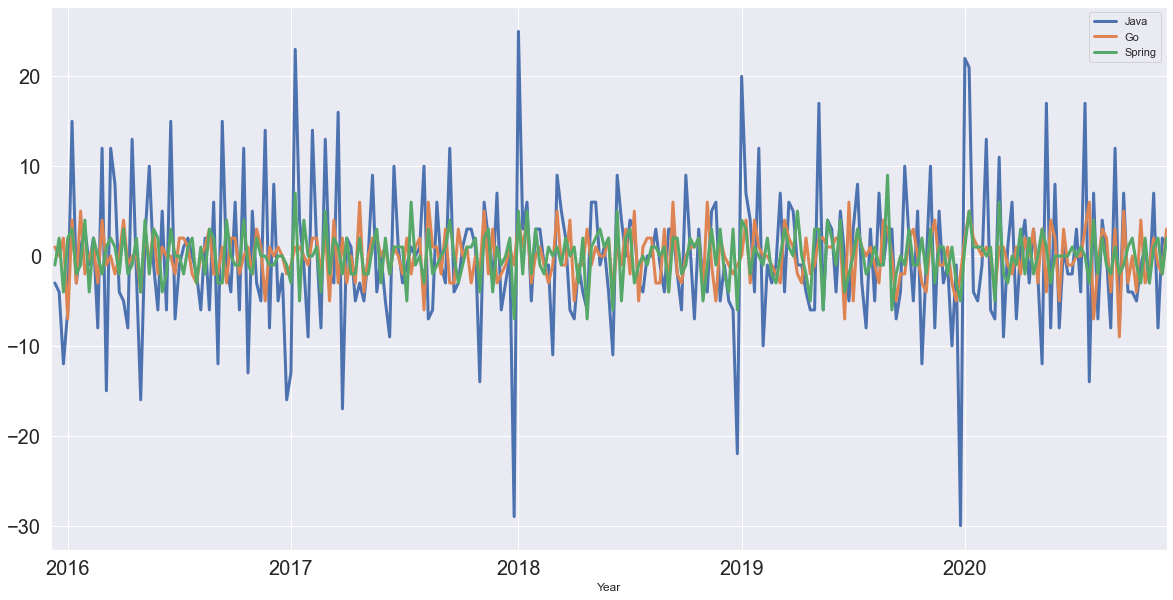

In [17]:
assert np.all((java.diff() == java - java.shift())[1:])
df.diff().plot(figsize=(20,10), linewidth=3, fontsize=20)
plt.xlabel('Year')

            Java        Go    Spring
Java    1.000000 -0.039315 -0.114142
Go     -0.039315  1.000000  0.578326
Spring -0.114142  0.578326  1.000000


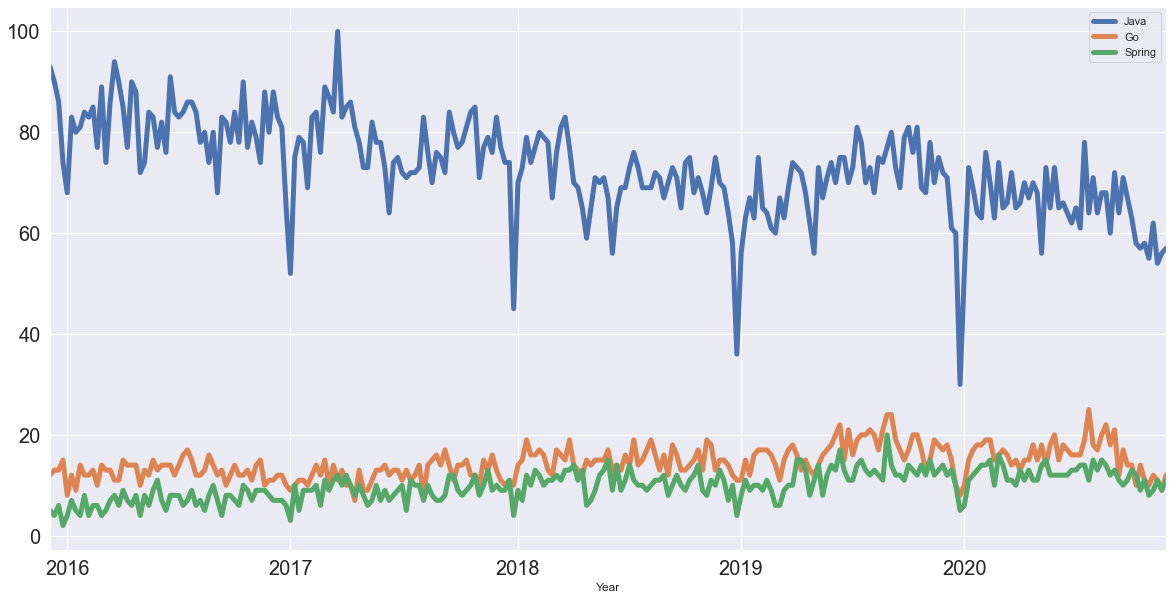

In [18]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year')
print(df.corr())

<AxesSubplot:>

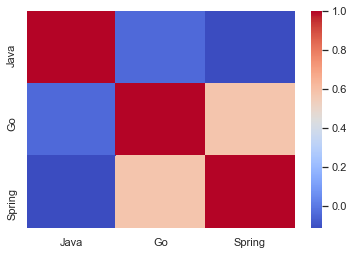

In [19]:
sns.heatmap(df.corr(), cmap='coolwarm')

            Java        Go    Spring
Java    1.000000  0.151918  0.396968
Go      0.151918  1.000000  0.182130
Spring  0.396968  0.182130  1.000000


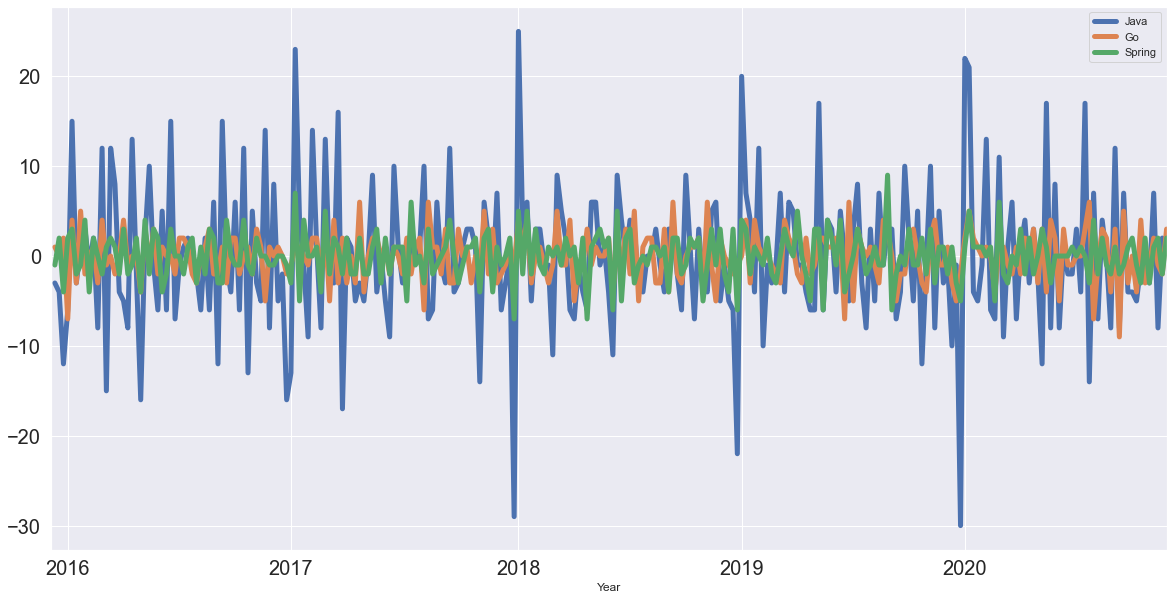

In [20]:
df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year')
print(df.diff().corr())

<AxesSubplot:>

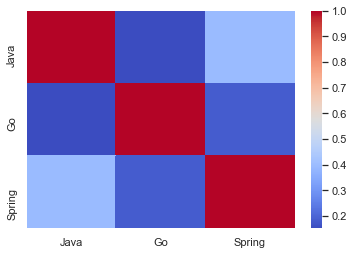

In [21]:
sns.heatmap(df.diff().corr(), cmap='coolwarm')

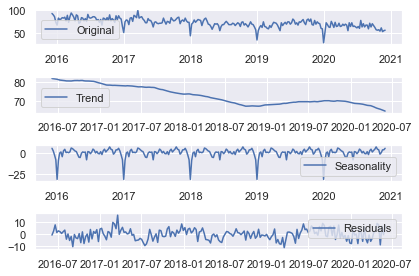

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

x = java

x = x.astype(float) # force float
decomposition = seasonal_decompose(x)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(x, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

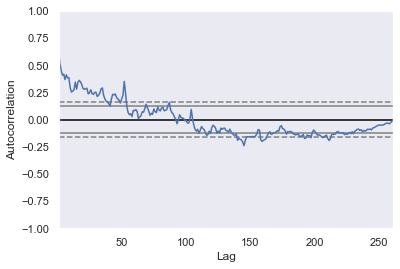

In [25]:
from pandas.plotting import autocorrelation_plot

x = df["Java"].astype(float)
autocorrelation_plot(x)

C:\Users\offic\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:666: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


Text(0.5, 1.0, 'Autocorrelation Function')

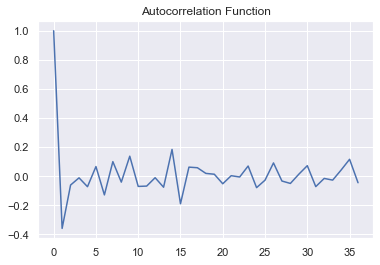

In [26]:
from statsmodels.tsa.stattools import acf

x_diff = x.diff().dropna() # first item is NA
lag_acf = acf(x_diff, nlags=36)
plt.plot(lag_acf)
plt.title('Autocorrelation Function')

C:\Users\offic\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:666: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


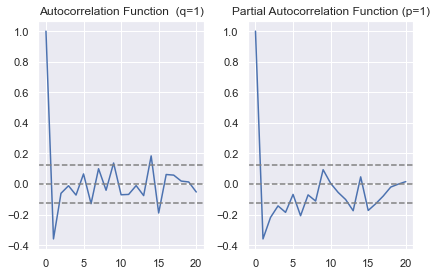

In [27]:
from statsmodels.tsa.stattools import acf, pacf

x = df["Java"].astype(float)

x_diff = x.diff().dropna() # first item is NA
# ACF and PACF plots:

lag_acf = acf(x_diff, nlags=20)
lag_pacf = pacf(x_diff, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function  (q=1)')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function (p=1)')
plt.tight_layout()

C:\Users\offic\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\offic\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-SUN

                              ARMA Model Results                              
Dep. Variable:                   Java   No. Observations:                  261
Model:                     ARMA(1, 1)   Log Likelihood                -875.705
Method:                       css-mle   S.D. of innovations              6.921
Date:                Sun, 06 Dec 2020   AIC                           1759.410
Time:                        02:53:20   BIC                           1773.668
Sample:                    12-06-2015   HQIC                          1765.141
                         - 11-29-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.9115      2.383     30.598      0.000      68.241      77.582
ar.L1.Java     0.9186      0.044     20.787      0.000       0.832       1.005
ma.L1.Java    -0.5302      0.108     -4.922      0.0

Text(0.5, 1.0, 'RSS: 12705.3710')

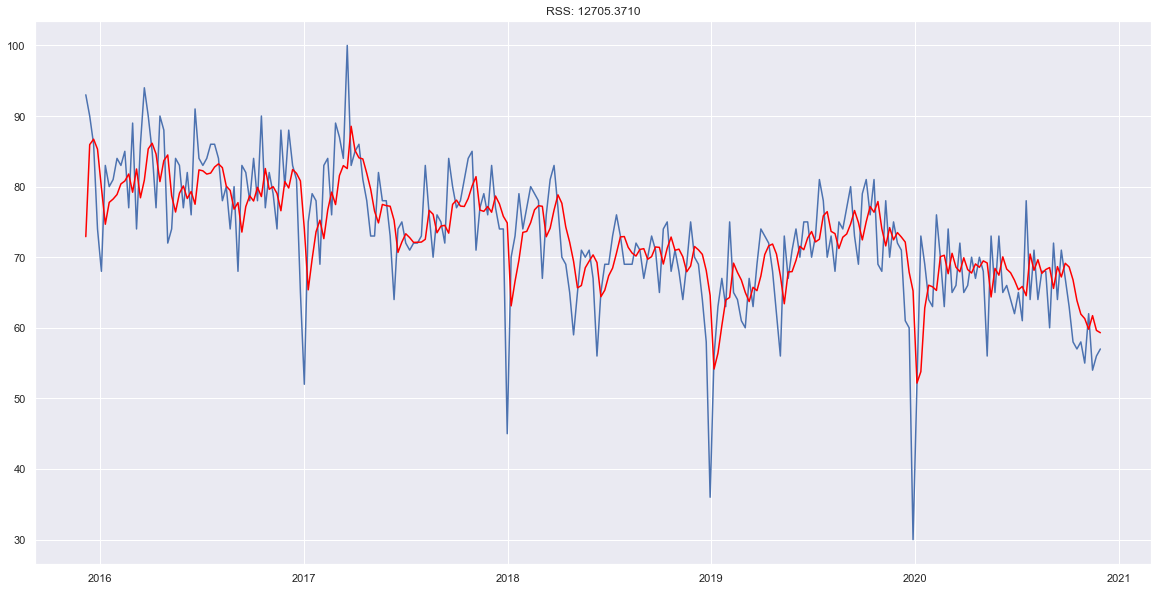

In [28]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(x, order=(1, 1)).fit() # fit model

print(model.summary())
plt.figure(figsize=(20,10))
plt.plot(x)
plt.plot(model.predict(), color='red')
plt.title('RSS: %.4f'% sum((model.fittedvalues-x)**2))